In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_excel("World military power.xlsx",skiprows=[0])  #header = 1

In [ ]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


In [ ]:
df.shape

(138, 60)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

In [ ]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    float64
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    float64
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    float64
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    float64
 10  trainer_aircraft_fleet                   138 non-n

In [ ]:
missing = df. isnull(). sum() * 100 / len(df)
missing.sort_values(ascending=False)

total_coastline_coverage_value             21.014493
total_coastline_coverage                   21.014493
submarine_fleet_strength                   16.666667
frigate_fleet_strength_value               16.666667
frigate_fleet_strength                     16.666667
destroyer_fleet_strength_value             16.666667
destroyer_fleet_strength                   16.666667
submarine_fleet_strength_value             16.666667
aircraft_carrier_fleet_strength_value      16.666667
aircraft_carrier_fleet_strength            16.666667
navy_fleet_strengths                       10.144928
navy_fleet_strengths_value                 10.144928
total_border_coverage                       6.521739
total_border_coverage_value                 6.521739
attack_helicopter_fleet_strength            0.000000
available_manpower                          0.000000
external_debt_value                         0.000000
airport_totals                              0.000000
airport_totals_value                        0.

In [ ]:
Values = df.filter(regex="value",axis= 1).select_dtypes(['object'])

In [ ]:
Values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   defense_spending_budget_value   138 non-null    object
 1   external_debt_value             138 non-null    object
 2   oil_production_value            138 non-null    object
 3   oil_consumption_value           138 non-null    object
 4   proven_oil_reserves_value       138 non-null    object
 5   available_manpower_value        138 non-null    object
 6   total_population_value          138 non-null    object
 7   total_square_land_area_value    138 non-null    object
 8   total_coastline_coverage_value  109 non-null    object
 9   total_waterway_coverage_value   138 non-null    object
dtypes: object(10)
memory usage: 10.9+ KB


In [ ]:
liste=list(Values.columns)
liste

['defense_spending_budget_value',
 'external_debt_value',
 'oil_production_value',
 'oil_consumption_value',
 'proven_oil_reserves_value',
 'available_manpower_value',
 'total_population_value',
 'total_square_land_area_value',
 'total_coastline_coverage_value',
 'total_waterway_coverage_value']

In [ ]:
liste=list(Values.columns)
for i in liste:
  df[i] = df[i].str.replace(",","")
  df[i] = df[i].astype(float)
print(df)

    military_strength  military_strength_power_index aircraft_strength  \
0         Afghanistan                         1.3444       Afghanistan   
1             Albania                         2.3137           Albania   
2             Algeria                         0.4659           Algeria   
3              Angola                         0.8379            Angola   
4           Argentina                         0.6521         Argentina   
..                ...                            ...               ...   
133         Venezuela                         0.6449         Venezuela   
134           Vietnam                         0.3559           Vietnam   
135             Yemen                         1.2412             Yemen   
136            Zambia                         1.6464            Zambia   
137          Zimbabwe                         1.7577          Zimbabwe   

     aircraft_strength_value fighter/interceptor_strength  \
0                      260.0                  Afgh

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    float64
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    float64
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    float64
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    float64
 10  trainer_aircraft_fleet                   138 non-n

In [ ]:
for col in df.select_dtypes(['int64','float64']).columns:
  df[col].fillna(0,inplace= True, axis=0)

In [ ]:
df.isnull().sum()

military_strength                           0
military_strength_power_index               0
aircraft_strength                           0
aircraft_strength_value                     0
fighter/interceptor_strength                0
fighter/interceptor_strength_value          0
attack_aircraft_strength                    0
attack_aircraft_strength_value              0
transport_aircraft_fleet_strength           0
transport_aircraft_fleet_strength_value     0
trainer_aircraft_fleet                      0
trainer_aircraft_fleet_value                0
helicopter_fleet_strength                   0
helicopter_fleet_strength_value             0
attack_helicopter_fleet_strength            0
attack_helicopter_fleet_strength_value      0
tank_strength                               0
tank_strength_value                         0
afv/apc_strength                            0
afv/apc_strength_value                      0
self-propelled_artillery_strength           0
self-propelled_artillery_strength_

In [ ]:
df[df["total_coastline_coverage_value"]==0]["total_coastline_coverage_value"].count()

137

In [ ]:
df[df["total_waterway_coverage_value"]==0]["total_waterway_coverage_value"].count()

135

In [ ]:
df[df["total_border_coverage_value"]==0]["total_border_coverage_value"]

6      0.0
9      0.0
57     0.0
69     0.0
83     0.0
95     0.0
105    0.0
113    0.0
119    0.0
Name: total_border_coverage_value, dtype: float64

In [ ]:
df[df["total_square_land_area_value"]==0]["total_square_land_area_value"]

1      0.0
5      0.0
7      0.0
8      0.0
9      0.0
12     0.0
13     0.0
15     0.0
28     0.0
30     0.0
32     0.0
33     0.0
36     0.0
37     0.0
42     0.0
53     0.0
54     0.0
58     0.0
61     0.0
64     0.0
65     0.0
68     0.0
74     0.0
76     0.0
82     0.0
88     0.0
92     0.0
97     0.0
98     0.0
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
110    0.0
113    0.0
117    0.0
119    0.0
128    0.0
Name: total_square_land_area_value, dtype: float64

In [ ]:
drop_columns = ["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"]
df.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
x = df.select_dtypes(['int64','float64'])

In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
military_strength_power_index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
aircraft_strength_value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
fighter/interceptor_strength_value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
attack_aircraft_strength_value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
transport_aircraft_fleet_strength_value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
trainer_aircraft_fleet_value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
helicopter_fleet_strength_value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
attack_helicopter_fleet_strength_value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
tank_strength_value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
afv/apc_strength_value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.92271532061612
Number of cluster 3,silhouette0.8995442950406478
Number of cluster 4,silhouette0.867143627157688
Number of cluster 5,silhouette0.8675195540883277
Number of cluster 6,silhouette0.7789462746206014
Number of cluster 7,silhouette0.7817947547146873
Number of cluster 8,silhouette0.7847423624686134
Number of cluster 9,silhouette0.6818555402590025


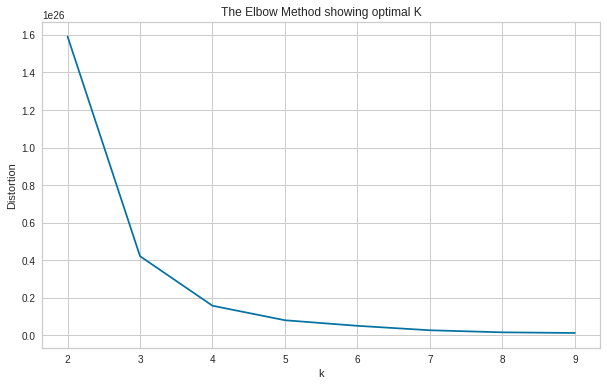

In [ ]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()
#düşme nerde durursa ideal cluster sayısı o.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

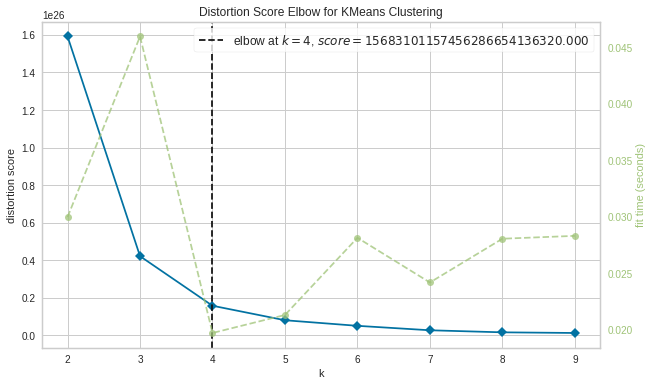

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x)
visu.poof()

In [ ]:
model=KMeans(n_clusters=4)
model=model.fit(x)
tahmin=model.predict(x)

In [ ]:
tahmin

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
silhouette_score(x,tahmin)

0.867143627157688

In [ ]:
x['cluster']=tahmin

In [ ]:
d={3:"orta gelismis",2:"gelismis",1:"cok gelismis",0:"gelismemis"}
x['gelismislik']=x.cluster.map(d)

In [ ]:
x.sample(10).T

,76,63,130,55,0,132,125,41,81,5
military_strength_power_index,2.9941,3.4433,0.0606,0.2111,1.3444,0.8086,1.3292,3.3736,2.9891,2.1251
aircraft_strength_value,9.0,33.0,13264.0,860.0,260.0,185.0,72.0,23.0,16.0,64.0
fighter/interceptor_strength_value,0.0,0.0,2085.0,99.0,0.0,66.0,24.0,6.0,0.0,0.0
attack_aircraft_strength_value,0.0,0.0,715.0,110.0,25.0,20.0,20.0,0.0,0.0,9.0
transport_aircraft_fleet_strength_value,0.0,2.0,945.0,38.0,30.0,18.0,3.0,2.0,3.0,3.0
trainer_aircraft_fleet_value,0.0,4.0,2643.0,185.0,0.0,2.0,0.0,0.0,0.0,13.0
helicopter_fleet_strength_value,9.0,27.0,5768.0,439.0,187.0,79.0,25.0,15.0,13.0,37.0
attack_helicopter_fleet_strength_value,0.0,0.0,967.0,59.0,0.0,25.0,10.0,0.0,0.0,20.0
tank_strength_value,0.0,65.0,6289.0,200.0,0.0,420.0,712.0,0.0,0.0,110.0
afv/apc_strength_value,26.0,30.0,39253.0,6947.0,1062.0,1215.0,2000.0,70.0,214.0,748.0


In [ ]:
x.gelismislik.value_counts()

gelismemis       124
orta gelismis      9
gelismis           4
cok gelismis       1
Name: gelismislik, dtype: int64

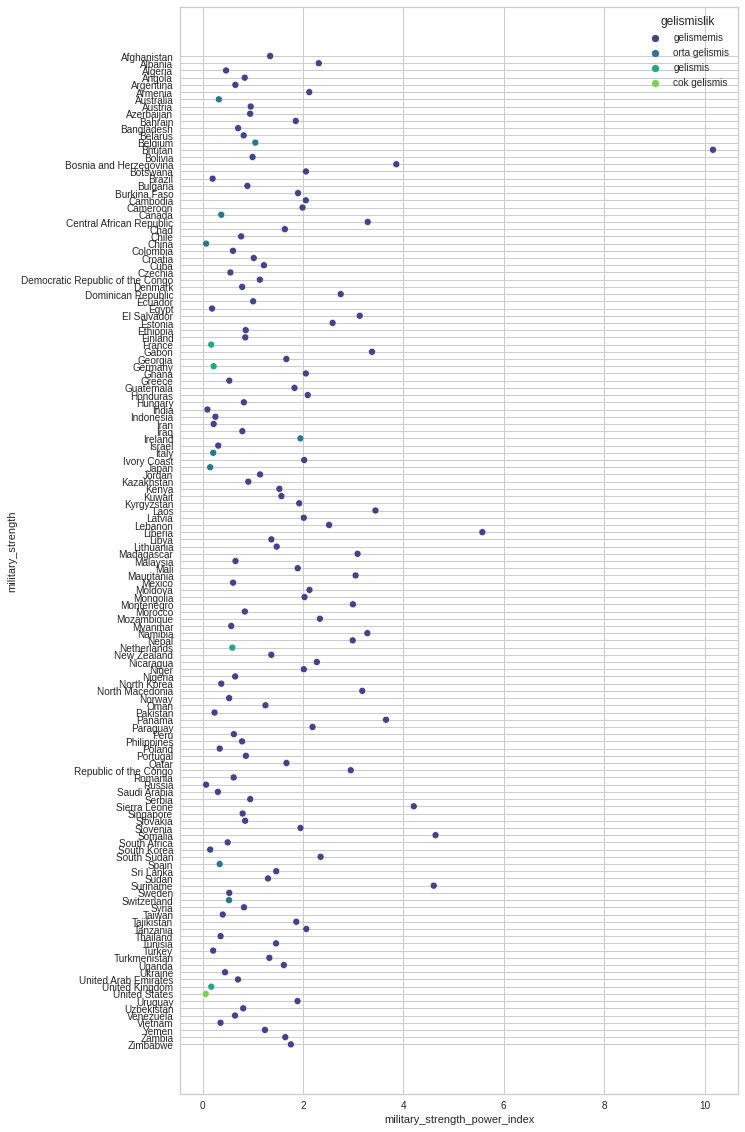

In [ ]:
plt.figure(figsize=(10,20))
sns.scatterplot(x["military_strength_power_index"], 
                df["military_strength"], hue= x.gelismislik,palette= "viridis");

In [ ]:
df=df.merge(x)

In [ ]:
df['military_strength_power_index'].describe()

count    138.000000
mean       1.460716
std        1.324018
min        0.060600
25%        0.574800
50%        1.034100
75%        2.021525
max       10.168100
Name: military_strength_power_index, dtype: float64

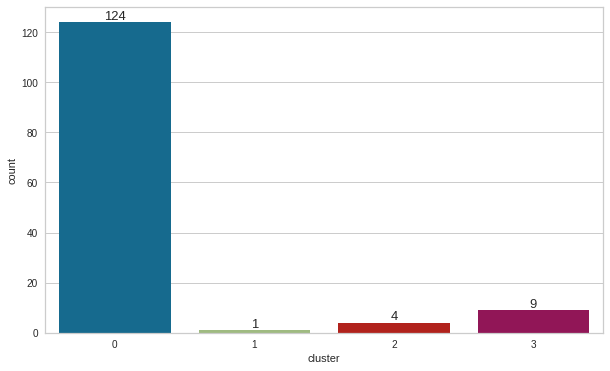

In [ ]:
df.cluster.value_counts()

sns.countplot(x=df["cluster"], data=df)
for index,value in enumerate(df.cluster.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [ ]:
#plt.figure(figsize= (8,8))
#explode = [0.1,0.1,0.1,0.1]  #dilim ayırma 
#df["gelismislik"].value_counts().plot.pie(autopct="%1.1f%%",explode=explode);

In [ ]:
df[df["gelismislik"]=="cok gelismis"]

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_coastline_coverage,total_waterway_coverage,total_border_coverage,cluster,gelismislik
130,United States,0.0606,United States,13264.0,United States,2085.0,United States,715.0,United States,945.0,...,United States,144872845.0,United States,329256465.0,United States,United States,United States,United States,1,cok gelismis


In [ ]:
df[df["gelismislik"]=="gelismis"]

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_coastline_coverage,total_waterway_coverage,total_border_coverage,cluster,gelismislik
40,France,0.1702,France,1229.0,France,269.0,France,0.0,France,121.0,...,France,30111868.0,France,67364357.0,France,France,France,France,2,gelismis
43,Germany,0.2186,Germany,712.0,Germany,128.0,Germany,74.0,Germany,71.0,...,Germany,37010559.0,Germany,80457737.0,Germany,Germany,Germany,Germany,2,gelismis
82,Netherlands,0.5919,Netherlands,168.0,Netherlands,61.0,Netherlands,1.0,Netherlands,4.0,...,Netherlands,7820960.0,Netherlands,17151228.0,Netherlands,Netherlands,Netherlands,Netherlands,2,gelismis
129,United Kingdom,0.1717,United Kingdom,733.0,United Kingdom,133.0,United Kingdom,15.0,United Kingdom,44.0,...,United Kingdom,29948413.0,United Kingdom,65105246.0,United Kingdom,United Kingdom,United Kingdom,United Kingdom,2,gelismis


In [ ]:
df[df["gelismislik"]=="orta gelismis"]

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_coastline_coverage,total_waterway_coverage,total_border_coverage,cluster,gelismislik
6,Australia,0.3225,Australia,464.0,Australia,82.0,Australia,6.0,Australia,38.0,...,Australia,10808002.0,Australia,2.347014e+07,Australia,Australia,Australia,NaN,3,orta gelismis
12,Belgium,1.0499,Belgium,148.0,Belgium,43.0,Belgium,0.0,Belgium,12.0,...,Belgium,4833107.0,Belgium,1.157076e+07,Belgium,Belgium,Belgium,Belgium,3,orta gelismis
22,Canada,0.3712,Canada,385.0,Canada,62.0,Canada,0.0,Canada,38.0,...,Canada,16110865.0,Canada,3.588166e+07,Canada,Canada,Canada,Canada,3,orta gelismis
26,China,0.0691,China,3210.0,China,1232.0,China,371.0,China,224.0,...,China,752855402.0,China,1.384689e+09,China,China,China,China,3,orta gelismis
53,Ireland,1.9481,Ireland,19.0,Ireland,0.0,Ireland,0.0,Ireland,0.0,...,Ireland,2366779.0,Ireland,5.068050e+06,Ireland,Ireland,Ireland,Ireland,3,orta gelismis
55,Italy,0.2111,Italy,860.0,Italy,99.0,Italy,110.0,Italy,38.0,...,Italy,28011003.0,Italy,6.224667e+07,Italy,Italy,Italy,Italy,3,orta gelismis
57,Japan,0.1501,Japan,1561.0,Japan,279.0,Japan,12.0,Japan,60.0,...,Japan,53873803.0,Japan,1.261682e+08,Japan,Japan,Japan,NaN,3,orta gelismis
112,Spain,0.3388,Spain,512.0,Spain,137.0,Spain,12.0,Spain,46.0,...,Spain,23136275.0,Spain,4.933108e+07,Spain,Spain,Spain,Spain,3,orta gelismis
117,Switzerland,0.5259,Switzerland,169.0,Switzerland,54.0,Switzerland,0.0,Switzerland,18.0,...,Switzerland,3632250.0,Switzerland,8.292809e+06,Switzerland,NaN,Switzerland,Switzerland,3,orta gelismis


In [ ]:
df[df["gelismislik"]=="gelismemis"]

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_coastline_coverage,total_waterway_coverage,total_border_coverage,cluster,gelismislik
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,14325743.0,Afghanistan,34940837.0,Afghanistan,Afghanistan,Afghanistan,Afghanistan,0,gelismemis
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,1519438.0,Albania,3057220.0,Albania,Albania,Albania,Albania,0,gelismemis
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,20741263.0,Algeria,41657488.0,Algeria,Algeria,Algeria,Algeria,0,gelismemis
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,6244205.0,Angola,30355880.0,Angola,Angola,Angola,Angola,0,gelismemis
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,20179430.0,Argentina,44694198.0,Argentina,Argentina,Argentina,Argentina,0,gelismemis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,Venezuela,260.0,Venezuela,38.0,Venezuela,0.0,Venezuela,52.0,...,Venezuela,14260129.0,Venezuela,31689176.0,Venezuela,Venezuela,Venezuela,Venezuela,0,gelismemis
134,Vietnam,0.3559,Vietnam,293.0,Vietnam,77.0,Vietnam,0.0,Vietnam,38.0,...,Vietnam,51043216.0,Vietnam,97040334.0,Vietnam,Vietnam,Vietnam,Vietnam,0,gelismemis
135,Yemen,1.2412,Yemen,169.0,Yemen,77.0,Yemen,0.0,Yemen,8.0,...,Yemen,11266221.0,Yemen,28667230.0,Yemen,Yemen,Yemen,Yemen,0,gelismemis
136,Zambia,1.6464,Zambia,108.0,Zambia,18.0,Zambia,0.0,Zambia,11.0,...,Zambia,6166905.0,Zambia,16445079.0,Zambia,NaN,Zambia,Zambia,0,gelismemis


In [ ]:
df[df["military_strength"] == "Russia"] ??

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,...,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_coastline_coverage,total_waterway_coverage,total_border_coverage,cluster,gelismislik
101,Russia,0.0681,Russia,4163.0,Russia,873.0,Russia,742.0,Russia,424.0,...,Russia,69640160.0,Russia,142122776.0,Russia,Russia,Russia,Russia,0,gelismemis
